In [1]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

# 1. Import Data

In [2]:
def load_images(directory):
  images = []
  for filename in os.listdir(directory):

    img = Image.open(os.path.join(directory, filename))
    img = img.resize((224, 224))
    img = img.convert('RGB')
    img = np.array(img) / 255.0
    images.append(img)

  return images

In [3]:
tumor_images = load_images('/content/drive/MyDrive/Colab Notebooks/data/yes')
no_tumor_images = load_images('/content/drive/MyDrive/Colab Notebooks/data/no')

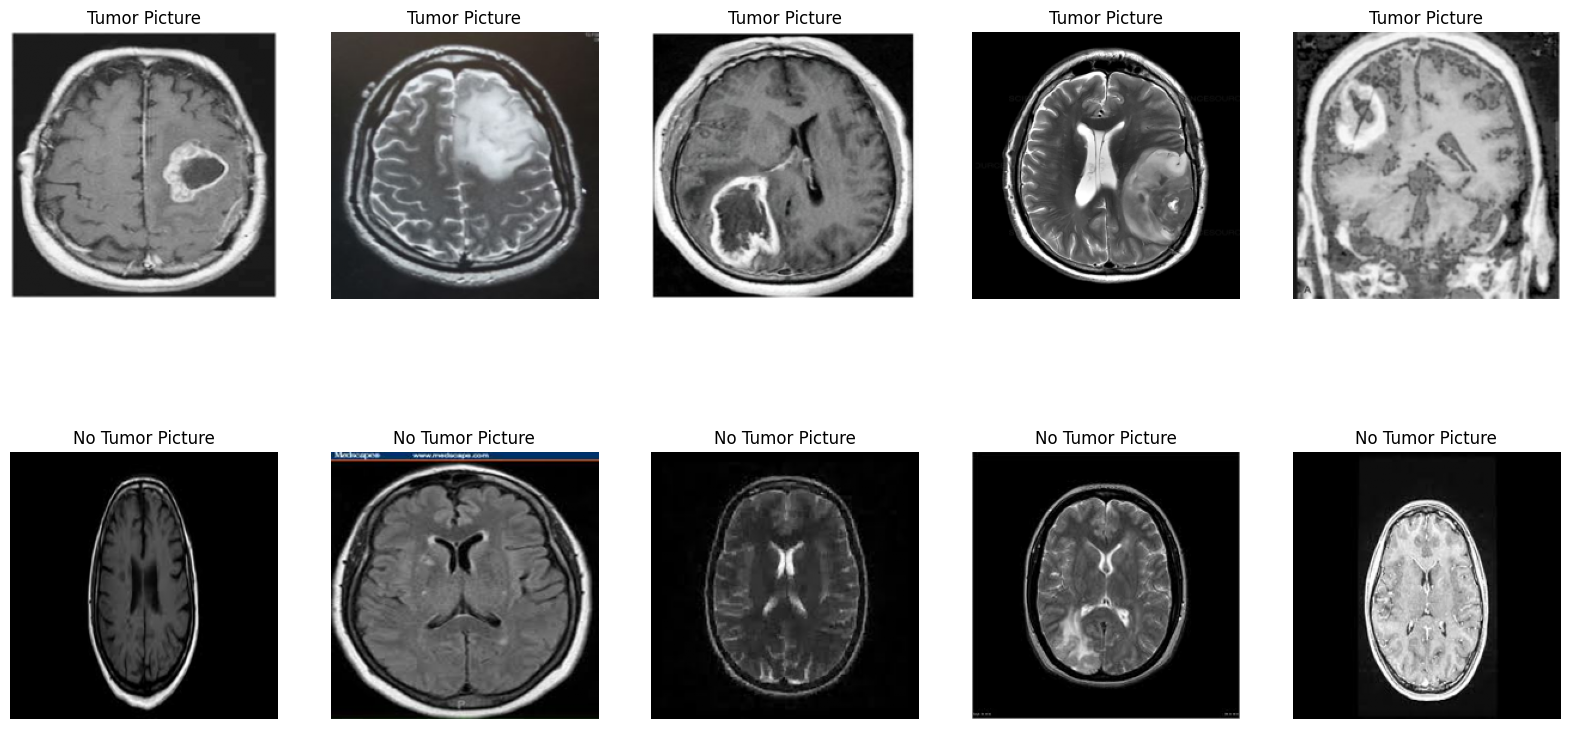

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
  axes[0, i].imshow(tumor_images[i])
  axes[0, i].set_title('Tumor Picture')
  axes[0, i].axis('off')

for i in range(5):
  axes[1, i].imshow(no_tumor_images[i])
  axes[1, i].set_title('No Tumor Picture')
  axes[1, i].axis('off')

plt.show()

In [5]:
type(tumor_images)

list

In [6]:
len(tumor_images)

155

In [7]:
len(no_tumor_images)

98

In [8]:
tumor_images

[array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [0.98431373, 0.98431373, 0.98431373],
         [0.97647059, 0.97647059, 0.97647059]],
 
        [[1.        , 1.        , 1.        ],
         [0.94901961, 0.94901961, 0.94901961],
         [0.82352941, 0.82352941, 0.82352941],
         ...,
         [0.8       , 0.8       , 0.8       ],
         [0.94901961, 0.94901961, 0.94901961],
         [0.98823529, 0.98823529, 0.98823529]],
 
        [[0.98431373, 0.98431373, 0.98431373],
         [0.83137255, 0.83137255, 0.83137255],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.45098039, 0.45098039, 0.45098039],
         [0.87058824, 0.87058824, 0.87058824],
         [1.        , 1.        , 1.        ]],
 
        ...,
 
        [[0.98431373, 0.98431373, 0.98431373],
         [0.83137255, 0.83137255, 0.83137

# 2. Labelling

In [9]:
def assign_labels(tumor_images, no_tumor_images):
  tumor_labels = np.ones(len(tumor_images))
  no_tumor_labels = np.zeros(len(no_tumor_images))
  return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [10]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [11]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
type(tumor_labels)

numpy.ndarray

In [14]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [15]:
data

[array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [0.98431373, 0.98431373, 0.98431373],
         [0.97647059, 0.97647059, 0.97647059]],
 
        [[1.        , 1.        , 1.        ],
         [0.94901961, 0.94901961, 0.94901961],
         [0.82352941, 0.82352941, 0.82352941],
         ...,
         [0.8       , 0.8       , 0.8       ],
         [0.94901961, 0.94901961, 0.94901961],
         [0.98823529, 0.98823529, 0.98823529]],
 
        [[0.98431373, 0.98431373, 0.98431373],
         [0.83137255, 0.83137255, 0.83137255],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.45098039, 0.45098039, 0.45098039],
         [0.87058824, 0.87058824, 0.87058824],
         [1.        , 1.        , 1.        ]],
 
        ...,
 
        [[0.98431373, 0.98431373, 0.98431373],
         [0.83137255, 0.83137255, 0.83137

In [17]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
data[0].shape

(224, 224, 3)

# 3. Splitting Data

In [19]:
x = np.array(data)
y = np.array(labels)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

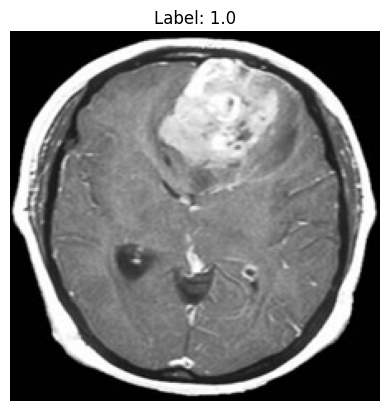

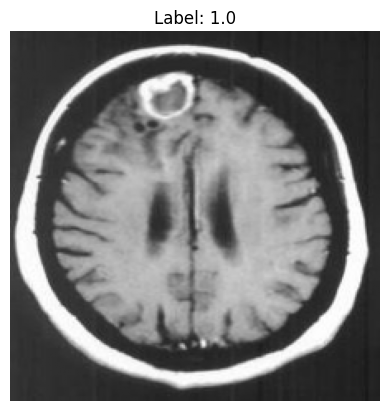

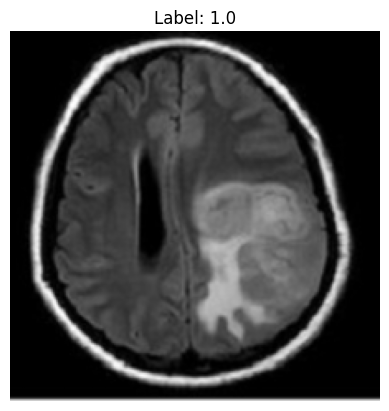

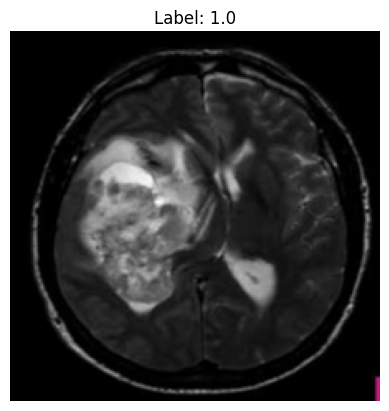

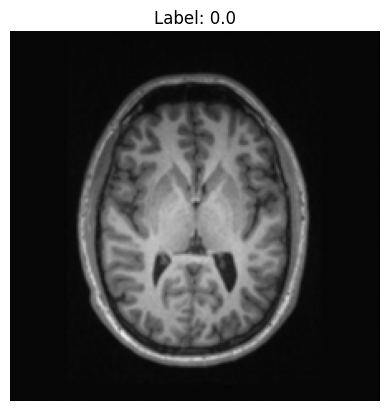

In [22]:
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image.numpy())
  plt.title('Label: {}'.format(label.numpy()))
  plt.axis('off')
  plt.show()

In [23]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [24]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

# 4. Training Data

In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3), padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 256)               100933888 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(train, validation_data=val, epochs=10, verbose=1)

Epoch 1/10
6/6 [==============================] - 22s 3s/step - loss: 17.8625 - accuracy: 0.6319 - val_loss: 3.5252 - val_accuracy: 0.7500
Epoch 2/10
6/6 [==============================] - 19s 3s/step - loss: 6.5346 - accuracy: 0.6923 - val_loss: 5.5053 - val_accuracy: 0.6000
Epoch 3/10
6/6 [==============================] - 20s 3s/step - loss: 4.2872 - accuracy: 0.7033 - val_loss: 0.5030 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 19s 3s/step - loss: 1.7462 - accuracy: 0.7637 - val_loss: 0.6499 - val_accuracy: 0.8000
Epoch 5/10
6/6 [==============================] - 18s 3s/step - loss: 0.6997 - accuracy: 0.8022 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.2804 - accuracy: 0.9066 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 20s 3s/step - loss: 0.1319 - accuracy: 0.9560 - val_loss: 0.0538 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=================

In [29]:
evaluation = model.evaluate(test)

2/2 [==============================] - 1s 284ms/step - loss: 1.2006 - accuracy: 0.8039


<function matplotlib.pyplot.show(close=None, block=None)>

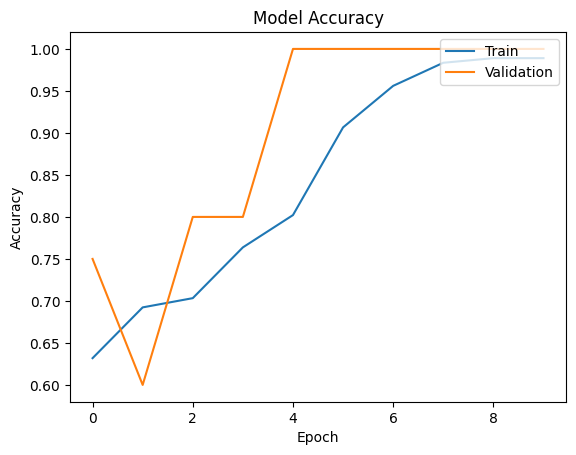

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

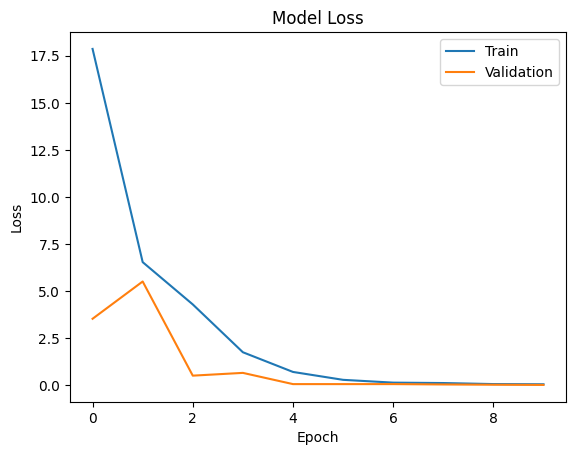

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show

In [35]:
model.save('/content/drive/MyDrive/Colab Notebooks/tumor_otak.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 5. Testing

In [40]:
def load_uploaded_image(image_bytes):
  image = Image.open(io.BytesIO(image_bytes))
  image = image.resize((224, 224))
  image_array = np.array(image) / 255.0
  return image_array

def predict_image(image_bytes):
  image_array = load_uploaded_image(image_bytes)
  image_array = np.expand_dims(image_array, axis=0)
  prediction = model.predict(image_array)
  if prediction[0][0] > 0.5:
    return 'Tumor'
  else:
    return 'No Tumor'

Saving Y50.JPG to Y50.JPG


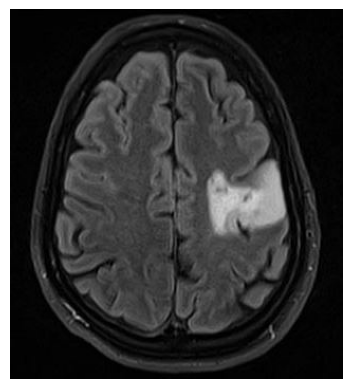

1/1 [==============================] - 0s 119ms/step
Tumor


In [44]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)